Exploratory Principal Component Analysis for Kaggle Ames Iowa Housing Prices Competition

Libraries necessary for the work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.2) #adopting James' convention

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pylab 
import scipy.stats as stats

from scipy.stats import skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
import xgboost

In [2]:
ls

Attacking with Random Forest! Universal dataset.ipynb
Datasets/
Exploratory_PCA_dmb-WenchangData.ipynb
Exploratory_PCA_dmb-final.ipynb
Exploratory_PCA_dmb.ipynb
FractalDimensionWaveform-KaggleHousing.ipynb
JAMES! Stack Attack This Random Forest! .ipynb
MetaStackAttack.ipynb
Presentation_Pics/
ProximaPresentation.key
ProximaPresentation.pdf
ProximaStack.py
Proxima_Centauri_Stacking.ipynb
Proxima_Stacking_Scheme.pdf
README.MD
Testing Random Forest....ipynb
Tree Based Models.pptx
[Wenchang_Qian] Kaggle_Ames_Iowa_Housing_Master_Notebook.ipynb
jamesczq_Ridge_XGBoost.ipynb
jamesczq_meaning_logError.pdf
jamesczq_proj3_starter.ipynb


In [3]:
# Read in train and test sets
X_train = pd.read_csv('Datasets/stack_trainx.csv');
X_test = pd.read_csv('Datasets/stack_testx.csv');
y_tr = pd.read_csv('Datasets/stack_trainy.csv');
y_train = y_tr.SalePrice.tolist()
# must log x-form the data
y_train = np.array(y_train)
y_train = np.log1p(y_train)

In [4]:
X_train.shape

(1460, 273)

In [5]:
len(y_train)

1460

In [6]:
y_train

array([ 12.24769912,  12.10901644,  12.31717117, ...,  12.49313327,
        11.86446927,  11.90159023])

In [7]:
X_train.shape

(1460, 273)

In [8]:
X_train.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,...,SaleCondition_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan
0,6.753438,6.751101,3.0,6.561031,0.0,0.693147,0.000000,5.017280,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,7.141245,0.000000,3.0,6.886532,0.0,0.000000,0.693147,5.652489,0.000000,0.693147,...,0,0,0,0,0,0,0,0,1,0
2,6.825460,6.765039,3.0,6.188264,0.0,0.693147,0.000000,6.075346,0.000000,0.693147,...,0,0,0,0,0,0,0,0,1,0
3,6.869014,6.629363,3.0,5.379897,0.0,0.693147,0.000000,6.293419,5.609472,0.693147,...,0,0,0,0,0,0,0,0,1,0
4,7.044033,6.960348,4.0,6.486161,0.0,0.693147,0.000000,6.196444,0.000000,0.693147,...,0,0,0,0,0,0,0,0,1,0


In [9]:
X_train.max()
X_train.isnull().values.any()

False

In [10]:
X_pca = RobustScaler().fit_transform(X_train)

In [11]:
type(X_pca)

numpy.ndarray

In [12]:
np.size(X_train,1)

273

In [17]:
pca = PCA(n_components=100).fit(X_pca)

X_pca = pca.transform(X_pca)

ValueError: array must not contain infs or NaNs

In [16]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

NameError: name 'pca' is not defined

In [14]:
plt.plot(var)
plt.ylabel('% Explained Variance in Data Set')
plt.xlabel('Number of Components')
plt.title('Amount of Variance Explained per Component')
plt.show()

NameError: name 'var' is not defined

In [15]:
X_train.keys()

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces',
       ...
       'SaleCondition_nan', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleType_nan'],
      dtype='object', length=273)

In [19]:
pca.explained_variance_ratio_

array([0.17348295, 0.10325015, 0.09027583, 0.07002652, 0.05308909,
       0.04318873, 0.03807281, 0.0378636 , 0.02903197, 0.02478084,
       0.01948012, 0.01906199, 0.01512633, 0.01465936, 0.01166071,
       0.01128061, 0.01015949, 0.00929228, 0.00823352, 0.00795061,
       0.00728295, 0.00700257, 0.00668011, 0.00652135, 0.00627573,
       0.00575419, 0.00543938, 0.00528644, 0.0050714 , 0.00488901,
       0.00474842, 0.00447556, 0.00436109, 0.00433902, 0.00404357,
       0.00384426, 0.00376815, 0.00358314, 0.00352843, 0.00341923,
       0.00337101, 0.00332504, 0.00318164, 0.0030692 , 0.00291212,
       0.00278058, 0.00273594, 0.00269114, 0.00252254, 0.00245307,
       0.00239129, 0.0023055 , 0.00223213, 0.00212896, 0.00206209,
       0.00204261, 0.00195825, 0.0018571 , 0.00184162, 0.00169189,
       0.00162786, 0.00158257, 0.00153747, 0.00149311, 0.001438  ,
       0.00140982, 0.00137933, 0.00131557, 0.00127078, 0.00124628,
       0.00122227, 0.00117955, 0.00117629, 0.0011283 , 0.00107

In [20]:
def component_results(data, pca):
    modes = ['Mode {}'.format(i) for i in range(1,len(pca.components_) + 1)]
    components = pd.DataFrame(np.round(pca.components_,4), columns = data.keys())
    components.index = modes
    # variance explained
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = modes
    
    # too many modes currently for plot to be useful
    # Plot the feature weights as a function of the components
    # components.plot(ax = ax, kind = 'bar')
    # ax.set_ylabel("Feature Weights") 
    # ax.set_xticklabels(modes, rotation=0)
    
    # Display the explained variance ratios# 
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Display the explained variance ratios
    # for i, ev in enumerate(pca.explained_variance_ratio_): 
        # ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [21]:
component_results = component_results(X_train, pca)

In [22]:
component_results.to_csv('./Datasets/eigenvectors.csv')

In [23]:
component_results.iloc[0:100,0].cumsum()

Mode 1      0.1735
Mode 2      0.2768
Mode 3      0.3671
Mode 4      0.4371
Mode 5      0.4902
Mode 6      0.5334
Mode 7      0.5715
Mode 8      0.6094
Mode 9      0.6384
Mode 10     0.6632
Mode 11     0.6827
Mode 12     0.7018
Mode 13     0.7169
Mode 14     0.7316
Mode 15     0.7433
Mode 16     0.7546
Mode 17     0.7648
Mode 18     0.7741
Mode 19     0.7823
Mode 20     0.7903
Mode 21     0.7976
Mode 22     0.8046
Mode 23     0.8113
Mode 24     0.8178
Mode 25     0.8241
Mode 26     0.8299
Mode 27     0.8353
Mode 28     0.8406
Mode 29     0.8457
Mode 30     0.8506
             ...  
Mode 71     0.9556
Mode 72     0.9568
Mode 73     0.9580
Mode 74     0.9591
Mode 75     0.9602
Mode 76     0.9613
Mode 77     0.9623
Mode 78     0.9633
Mode 79     0.9643
Mode 80     0.9652
Mode 81     0.9661
Mode 82     0.9670
Mode 83     0.9679
Mode 84     0.9687
Mode 85     0.9695
Mode 86     0.9703
Mode 87     0.9711
Mode 88     0.9719
Mode 89     0.9726
Mode 90     0.9733
Mode 91     0.9740
Mode 92     

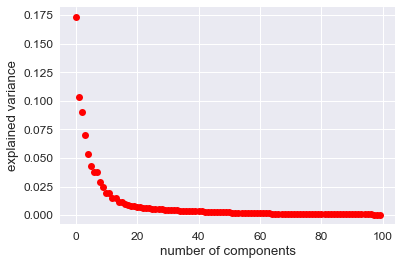

In [24]:
#Explained variance
plt.plot(pca.explained_variance_ratio_, 'ro')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [25]:
pca.components_

array([[-1.29970143e-01, -2.92930719e-03, -3.54642185e-02, ...,
         2.99988955e-04,  2.50929390e-02, -0.00000000e+00],
       [ 2.98867493e-02,  3.08861127e-02,  2.37823394e-03, ...,
        -1.81590205e-04, -2.50730707e-02,  0.00000000e+00],
       [ 1.01719826e-01, -4.33501150e-02,  1.55875464e-02, ...,
        -2.94616087e-04,  8.73334964e-04, -0.00000000e+00],
       ...,
       [ 4.98390326e-02,  2.22375120e-02,  7.32643869e-04, ...,
        -9.85885385e-03,  1.34491637e-01,  0.00000000e+00],
       [ 6.86196526e-03,  7.88755793e-03,  2.37844411e-02, ...,
         2.03623023e-02, -2.26389098e-01,  0.00000000e+00],
       [-3.57096300e-03, -6.34552329e-03,  8.71774542e-02, ...,
        -2.24612824e-02,  3.06906311e-01, -0.00000000e+00]])

Now, let's try to apply Linear, Ridge, and Lasso Models

In [26]:
# develop test of rmse to compare across models

def rmse_cv(model):
    rmse = np.sqrt( -cross_val_score(model, X_pca, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

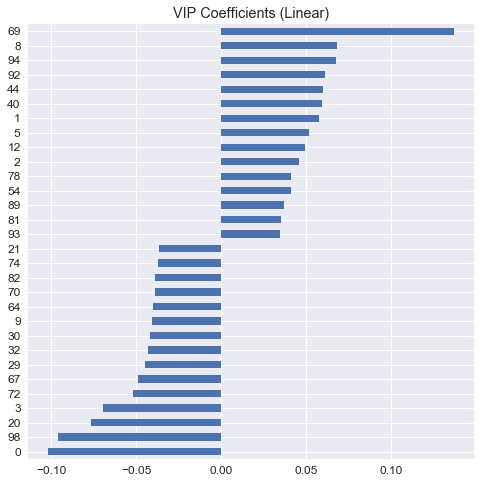

In [28]:
model_lin = houseRegr.fit(X_pca, y_train);
coeffs_lin = pd.Series(model_lin.coef_, index = X_pca.dtype.names);
vip_coeffs_lin = pd.concat([coeffs_lin.sort_values().head(15),
                              coeffs_lin.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_lin.plot(kind = "barh");
plt.title("VIP Coefficients (Linear)");

**************************************************
Ridge Performace: R^2 = 0.9113
**************************************************


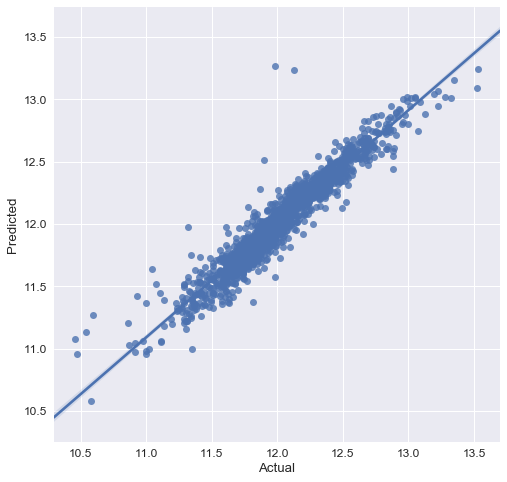

In [31]:
predictions_lin = pd.DataFrame({"Predicted":model_lin.predict(X_pca), 
                                  "Actual":y_train});
predictions_lin["Residual"] = predictions_lin.Actual - predictions_lin.Predicted;


print('*'*50)
print('Linear Performance: R^2 = {:.4f}'.format(model_lin.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_lin.Actual, predictions_lin.Predicted);

In [33]:
model_Ridge = Ridge()

In [34]:
# keeping parameters same as James
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-1,2,64)

cv_Ridge = [rmse_cv(Ridge(alpha = Alpha)).mean() for Alpha in alpha_array]

**************************************************
Ridge CV:
Minumum RMSE 0.1300 
achieved at alpha = 24.0410
**************************************************


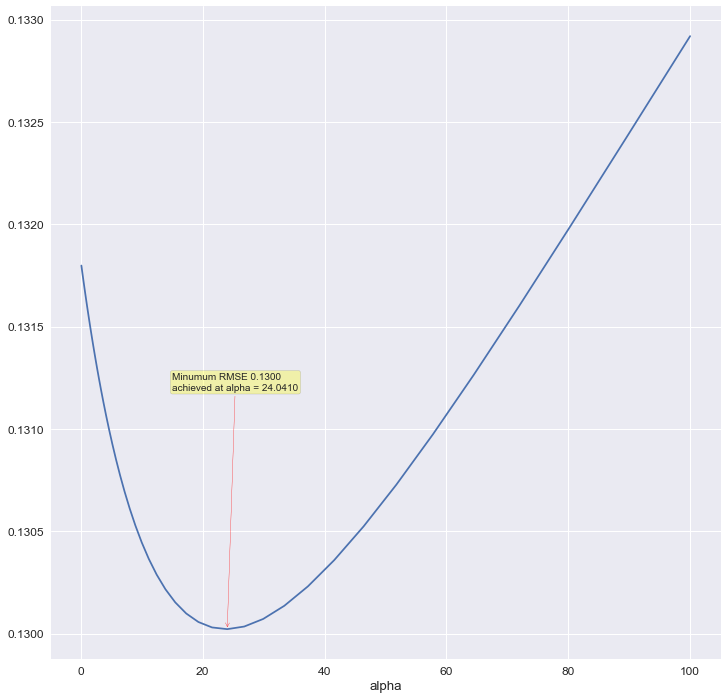

In [36]:
cv_Ridge = pd.Series(cv_Ridge, index = alpha_array)

fig, ax = plt.subplots(figsize=(12,12));
ax.plot(alpha_array,cv_Ridge);
ax.set_xlabel('alpha')
#ax.set_ylabel('RMSE')
alpha0 = cv_Ridge[cv_Ridge == cv_Ridge.min()].index[0];
rmse0 = cv_Ridge.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(alpha_array.mean(), cv_Ridge.mean()),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Ridge CV:')
print(s)
print('*'*50)

In [37]:
len(X_pca)

1460

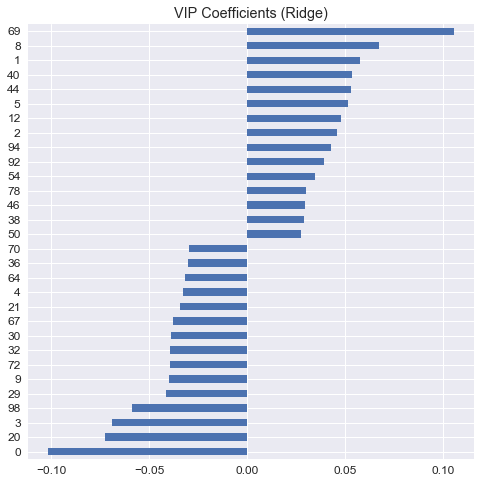

In [39]:
model_Ridge = Ridge(alpha0).fit(X_pca, y_train);
coeffs_Ridge = pd.Series(model_Ridge.coef_, index = X_pca.dtype.names);
vip_coeffs_Ridge = pd.concat([coeffs_Ridge.sort_values().head(15),
                              coeffs_Ridge.sort_values().tail(15)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Ridge.plot(kind = "barh");
plt.title("VIP Coefficients (Ridge)");

**************************************************
Ridge Performace: R^2 = 0.9097
**************************************************


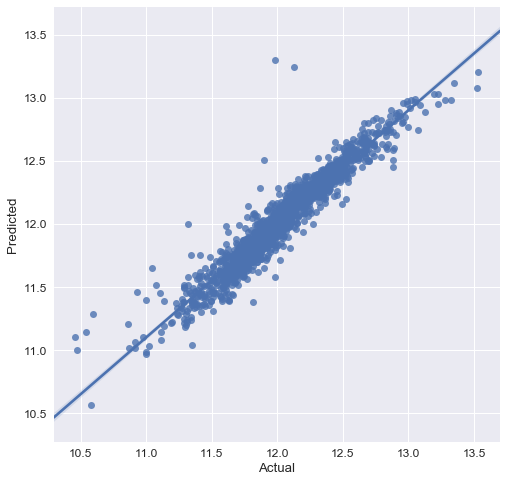

In [41]:
predictions_Ridge = pd.DataFrame({"Predicted":model_Ridge.predict(X_pca), 
                                  "Actual":y_train});
predictions_Ridge["Residual"] = predictions_Ridge.Actual - predictions_Ridge.Predicted;


print('*'*50)
print('Ridge Performace: R^2 = {:.4f}'.format(model_Ridge.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Ridge.Actual, predictions_Ridge.Predicted);

In [42]:
model_Lasso = Lasso()
# supply a log-ranged alphas from 10^(-2) to 10^(2)
# total: 60 alphas to do CV
alpha_array = np.logspace(-4,-2,256)

cv_Lasso = [rmse_cv(Lasso(alpha = Alpha)).mean() for Alpha in alpha_array]

In [43]:
len(Y_train)

NameError: name 'Y_train' is not defined

**************************************************
Lasso CV:
Minumum RMSE 0.1295 
achieved at alpha = 0.0007
**************************************************


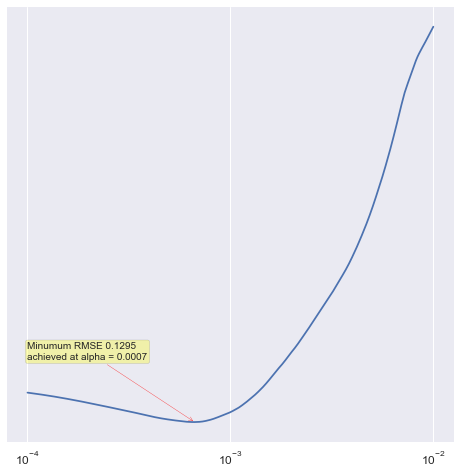

In [48]:
cv_Lasso = pd.Series(cv_Lasso, index = alpha_array)

fig, ax = plt.subplots(figsize=(8,8));
ax.loglog(alpha_array,cv_Lasso);
plt.grid(True);

alpha0 = cv_Lasso[cv_Lasso == cv_Lasso.min()].index[0];
rmse0 = cv_Lasso.min();
s = 'Minumum RMSE {:.4f} \nachieved at alpha = {:.4f}'.format(rmse0,alpha0)
ax.annotate(s, xy=(alpha0, rmse0),
               xycoords='data',
               xytext=(0.0001, 0.133),
               #textcoords='offset points',
               bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
               arrowprops=dict(arrowstyle='->',color='red'))

print('*'*50)
print('Lasso CV:')
print(s)
print('*'*50)

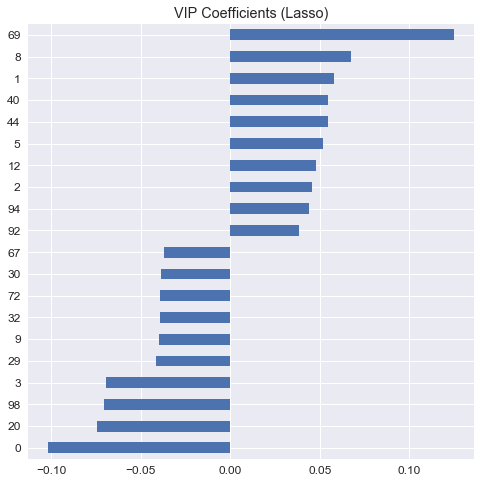

In [49]:
model_Lasso = Lasso(alpha0).fit(X_pca, y_train);


coeffs_Lasso = pd.Series(model_Lasso.coef_, index = X_pca.dtype.names);
vip_coeffs_Lasso = pd.concat([coeffs_Lasso.sort_values().head(10),
                              coeffs_Lasso.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Lasso)");

**************************************************
Lasso Performace: R^2 = 0.9088
**************************************************


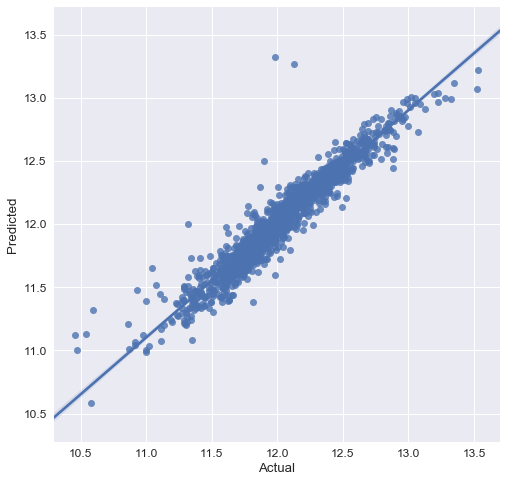

In [52]:
predictions_Lasso = pd.DataFrame({"Predicted":model_Lasso.predict(X_pca), 
                                  "Actual":y_train});
predictions_Lasso["Residual"] = predictions_Lasso.Actual - predictions_Lasso.Predicted;


print('*'*50)
print('Lasso Performace: R^2 = {:.4f}'.format(model_Lasso.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_Lasso.Actual, predictions_Lasso.Predicted);
#ax.set_title('')

Let's try elastic net

In [53]:
l1_search = np.arange(0.001, 0.1, step = 0.005)
model_elasticGrid = ElasticNetCV(l1_ratio = l1_search, n_alphas=100, cv =10).fit(X_pca, y_train);

In [72]:
l1_rat = model_elasticGrid.l1_ratio_
l1_rat

0.096

In [73]:
alphaCV = model_elasticGrid.alpha_
alphaCV

0.00810294927365829

In [54]:
model_elasticGrid.score(X_pca, y_train)

0.9066386246966567

In [55]:
rmse_cv(model_elasticGrid).min()

0.11347234416016695

In [56]:
model_elasticGrid.alpha_

0.00810294927365829

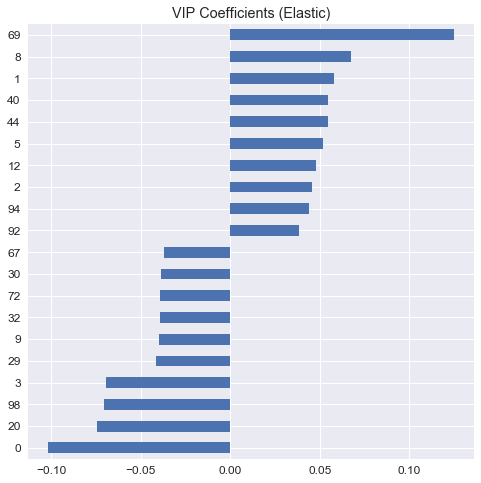

In [76]:
model_elasticNet = ElasticNet(l1_ratio = l1_rat, alpha = alphaCV).fit(X_pca, y_train);


coeffs_elastic = pd.Series(model_elasticGrid.coef_, index = X_pca.dtype.names);
vip_coeffs_elastic = pd.concat([coeffs_elastic.sort_values().head(10),
                              coeffs_elastic.sort_values().tail(10)])

fig, ax = plt.subplots(figsize=(8,8));
vip_coeffs_Lasso.plot(kind = "barh");
plt.title("VIP Coefficients (Elastic)");

**************************************************
Elastic Performace: R^2 = 0.9066
**************************************************


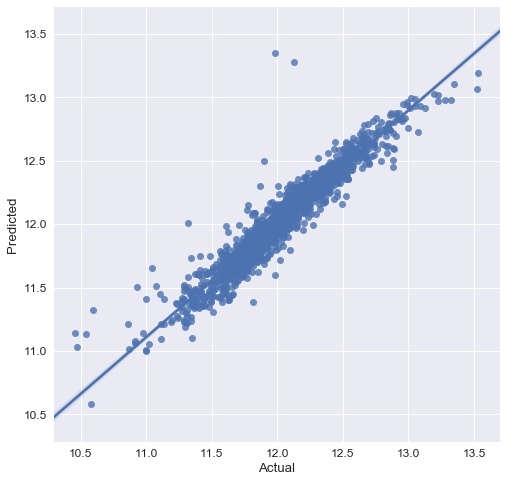

In [78]:
predictions_elastic = pd.DataFrame({"Predicted":model_elasticGrid.predict(X_pca), 
                                  "Actual":y_train});
predictions_elastic["Residual"] = predictions_elastic.Actual - predictions_elastic.Predicted;


print('*'*50)
print('Elastic Performace: R^2 = {:.4f}'.format(model_elasticGrid.score(X_pca, y_train)))
print('*'*50)


fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_elastic.Actual, predictions_elastic.Predicted);
#ax.set_title('')

Elastic has lower RMSE than either Ridge or Lasso, but R^2 is the same as Lasso and less than Ridge. 
VIP coefficients indistinguishable from Ridge

Employing XGBoost

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [82]:
xgb_parameters = {'learning_rate':[0.005, 0.01, 0.05, 0.1, 0.5],
                 'n_estimators':[50, 100, 200, 500]}

xgb_GridSearch = GridSearchCV(xgboost.XGBRegressor(), param_grid=xgb_parameters)

xgb_GridSearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.5], 'n_estimators': [50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [83]:
learning_rate0 = xgb_GridSearch.best_params_['learning_rate'];
n_estimators0 = xgb_GridSearch.best_params_['n_estimators'];

In [84]:
model_xgb = xgboost.XGBRegressor(learning_rate=learning_rate0,
                                 n_estimators=n_estimators0)

model_xgb = model_xgb.fit(X_train, y_train);

In [88]:
def rmse(y_predicted, y_actual):
    return( np.sqrt( mean_squared_error(y_actual, y_predicted) ) )

def R2(y_predicted, y_actual):
    # R^2 = 1 - SS_residual / SS_total
    SS_residual = sum((y_predicted - y_actual)**2)
    SS_total = sum((y_actual - y_actual.mean())**2)
    R2 = 1 - SS_residual / SS_total
    return(R2)

**************************************************
XGBooster Training Performance: R^2 = 0.9875
**************************************************
XGBooster Training Performance: RMSE = 0.0447
**************************************************


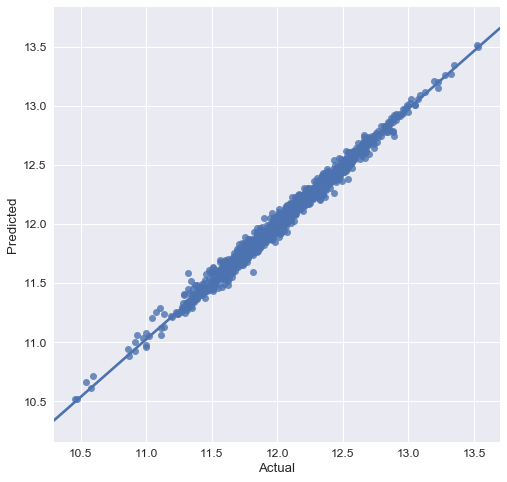

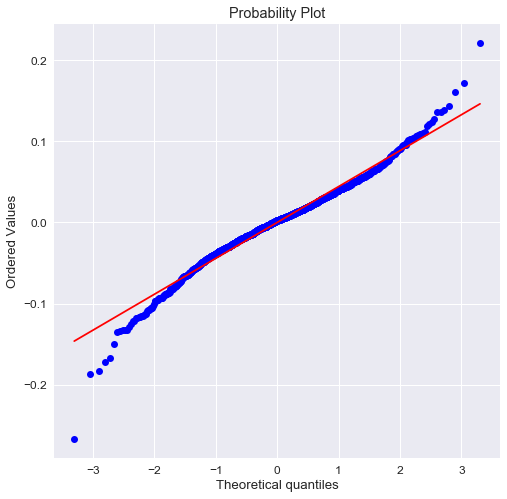

In [91]:
# The results are put in dataframe "predictions_xgb_train"

predictions_xgb_train = pd.DataFrame({"Predicted":model_xgb.predict(X_train), 
                                      "Actual":y_train});
predictions_xgb_train["Residual"] = predictions_xgb_train.Actual - predictions_xgb_train.Predicted;


print('*'*50)
print('XGBooster Training Performance: R^2 = {:.4f}'.format(R2(predictions_xgb_train.Predicted,
                                                              predictions_xgb_train.Actual)))
print('*'*50)
print('XGBooster Training Performance: RMSE = {:.4f}'.format(rmse(predictions_xgb_train.Actual,
                                                                 predictions_xgb_train.Predicted)))
print('*'*50) 

fig, ax = plt.subplots(figsize=(8,8));
sns.regplot(predictions_xgb_train.Actual, predictions_xgb_train.Predicted);
#ax.set_title('')

fig, ax = plt.subplots(figsize=(8,8));
stats.probplot(predictions_xgb_train.Residual, dist="norm", plot=pylab);
pylab.show();

In [49]:
# interpreting eigenmodes
component_results.iloc[3].sort_values()

MSZoning_RL             -0.3146
Neighborhood_NAmes      -0.2563
RoofStyle_Hip           -0.2212
MasVnrType_BrkFace      -0.1718
MasVnrArea              -0.1404
MoSold                  -0.0729
SaleCondition_Normal    -0.0654
Neighborhood_Sawyer     -0.0615
Neighborhood_Edwards    -0.0393
PavedDrive_Y            -0.0378
Neighborhood_NWAmes     -0.0343
MiscFeature_Shed        -0.0213
MasVnrType_BrkCmn       -0.0170
Neighborhood_Timber     -0.0105
Neighborhood_Mitchel    -0.0103
RoofStyle_Flat          -0.0074
SaleCondition_Abnorml   -0.0061
Neighborhood_ClearCr    -0.0027
MSZoning_C (all)        -0.0022
RoofStyle_Mansard       -0.0016
MiscFeature_Gar2        -0.0015
SaleCondition_AdjLand   -0.0008
SaleCondition_Family    -0.0007
RoofStyle_Shed          -0.0000
MiscFeature_Othr        -0.0000
MiscFeature_TenC         0.0001
SaleCondition_Alloca     0.0007
RoofStyle_Gambrel        0.0008
Neighborhood_Crawfor     0.0014
Neighborhood_CollgCr     0.0023
                          ...  
Neighbor

In [ ]:
components = component_results.T.sort_values(by = 'Mode 2')

In [ ]:
components.drop(['Explained Variance'], inplace = True)

In [ ]:
components.iloc[:,1]

In [ ]:
round(sum(list(map(lambda x: x**2, components.iloc[:,0]))))